In [1]:
#datos de titanic de kaggel
import pandas as pd
datos=pd.read_csv("train.csv")

In [2]:
#iniciamos explorando la informacion 
datos.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#revisamos algunas estadisticas basicas de la data
datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

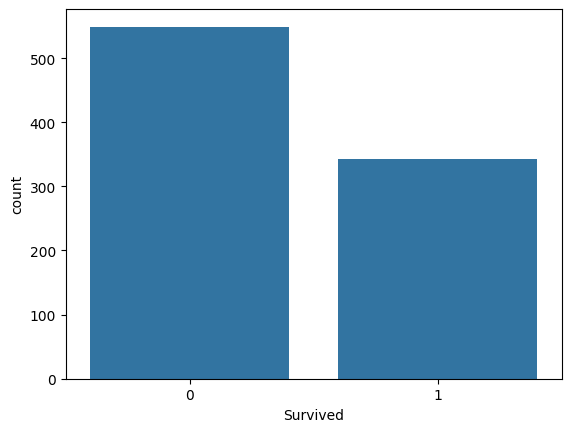

In [4]:
#vamos a graficar de la data cuantos sobrevivieron y cuantos no
import seaborn as sb
sb.countplot(x="Survived",data=datos)

<Axes: xlabel='Survived', ylabel='count'>

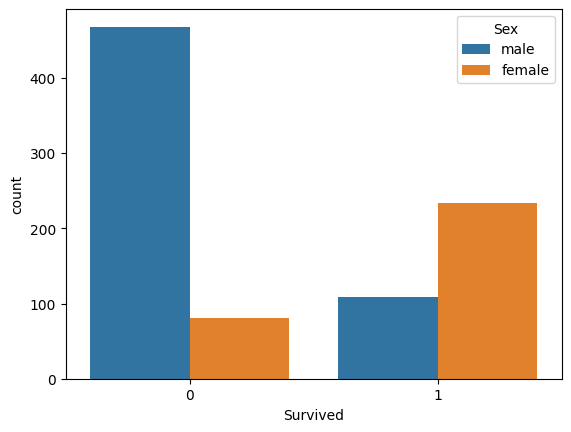

In [5]:
#con el parametro hue puedo pedir que me separe datos por sexo y 
# vemos algo interesante que sobrevivieron mas mujeres(tiene sentido)
sb.countplot(x="Survived",data=datos,hue="Sex")

In [6]:
#iniciamos limpieza de datos
#verificamos en que columnas tenemos datos na y cuantos(tenemos en age y en cabin)
datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

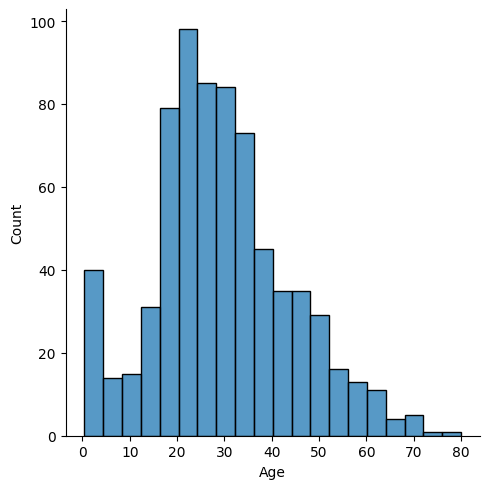

In [7]:
#graficamos para ver las frecuencias por edad 
sb.displot(x="Age",data=datos)

In [9]:
#llenamos los 177 datos na con el promedio de edades
#fillna llena los datos na  y dentro de parentesis se pone el promedio para que lo llene con promedio
datos["Age"].fillna(datos["Age"].mean())  #esta instruccion no actualiza el dataset
datos["Age"]=datos["Age"].fillna(datos["Age"].mean())  #esta instruccion si actualiza el dataset datos
datos["Age"]


0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [10]:
#verificamos en que columnas tenemos datos na y cuantos
datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
#los de cabina si vamos a quitar la caracteristica(columna) ya que no nos aporta valor axis=1 es columna
datos=datos.drop("Cabin",axis=1)
datos.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [12]:
#Ahora con los embarked solo vamos a borrar esas dos filas que tienen na en el campo embarked ya que no afectan el modelo al
# quitarlos
datos=datos.dropna(subset=["Embarked"])
datos.isna().sum() #ahora ya no tenemos na

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
datos.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [14]:
#ahora quitamos las columnas o caracteristicas que no nos sirven.  
datos=datos.drop(["PassengerId","Name","Ticket"],axis=1)
datos.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [15]:
#ahora tenemos que convertir a numero las columnas categoricas como por ejemplo Sex
pd.get_dummies(datos["Sex"]).astype(int)   #el astype(int) fue necesario porque me regresaba true y false en lugar de 1 y  0

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [16]:
#pero en este caso no necesitamos las dos columnas ya que una es 0 y la otra 1 siempre entonces dejemos solo una
pd.get_dummies(datos["Sex"],drop_first=True).astype(int)   #drop_first quita la primera columan
#vamos a agregarlo a que el resultado lo ponga en una variable
dummies_sex=pd.get_dummies(datos["Sex"],drop_first=True).astype(int) 


In [17]:
#ahora debo agregar esa columna dummiesSex a datos y quitar la de sex
datos=datos.join(dummies_sex) #agrega la columna nueva
datos=datos.drop('Sex', axis=1) #quita la columna sex
datos.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1


<Axes: xlabel='Survived', ylabel='count'>

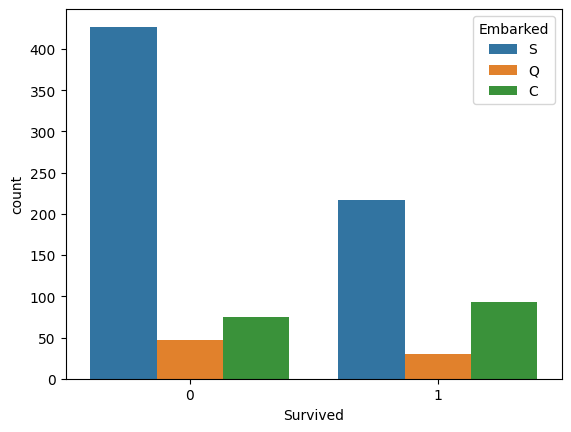

In [18]:
#ahora debemos ver que hacemos con embarked, y veremos si es relevante mantenerla
sb.countplot(x="Survived",data=datos,hue="Embarked")

In [19]:
#pero en este caso no necesitamos las tres columnas ya que una es 0 y la otra 1 siempre entonces dejemos solo dos
pd.get_dummies(datos["Embarked"],drop_first=True).astype(int)   #drop_first quita la primera columan
#vamos a agregarlo a que el resultado lo ponga en una variable
dummies_embarked=pd.get_dummies(datos["Embarked"],drop_first=True).astype(int) 
dummies_embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [20]:
#ahora debo agregar esas 2 columna dummiesembarked a datos y quitar la de embarked
datos=datos.join(dummies_embarked) #agrega la columna nueva
datos=datos.drop('Embarked', axis=1) #quita la columna embarked
datos.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


<Axes: >

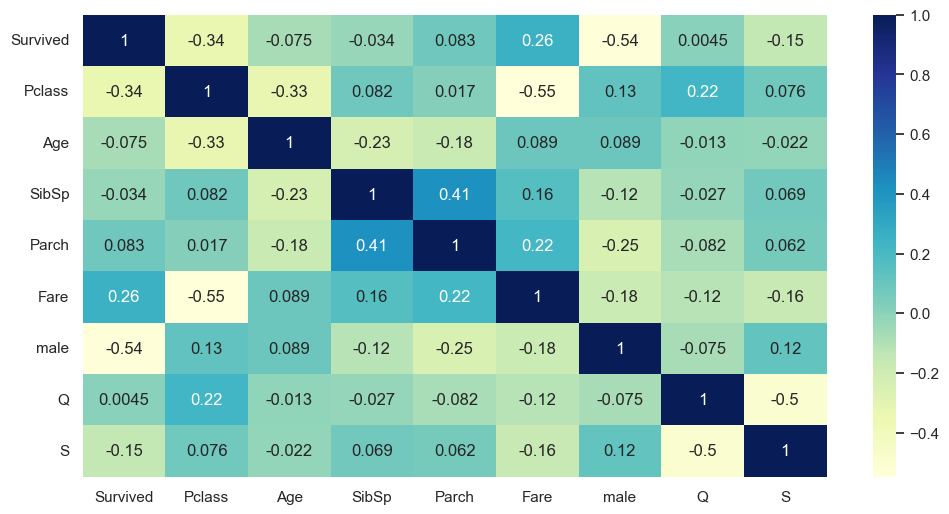

In [21]:
#ahora veamos las correlaciones
#como la tabla de arriba cuesta entenderla mejor generemos una grafica con esos datos
sb.set(rc={'figure.figsize':(12,6)}) #esta linea configura el tamanyo de la grafica para que se vea muy bien
sb.heatmap(datos.corr(),annot=True,cmap="YlGnBu") #el cmap le damos los tres colores que queremos si no nos gusta el default
#la grafica lo que nos da es la correlacion entre todas las variables donde 0 significa que no tienen relacion
#y 1 significa que tienen una relacion perfecta
#los positivos tienen relacion y los negativos tienen una relacion inversa
# por ejemplo el la relacion -0.54 de si es male dice qu esi eres hombre hay alta probabilidad que no sobrevivas
# por ejemplo pclas tambien mientras mas baja la clase mas probabilidad tienen de sobrevir
# se puede leer ente menos seas hombre mas probabilidad de sobrevivir
# entre menos clase tengas mas probabilidad de sobrevivir ojo que es ente mas pequeño sea el numero de clase y los de clase 1 es la clase mayor
# es decir que los de primera clase mas probabilidad tienen de sobrevivir
# entre mas pages (fare) mas probabilidad tienes de sobrevir, si fuera negativo fuera entre menos pages 

### Empezamos el entrenamiento


In [22]:
X=datos.drop(["Survived"],axis=1)
y=datos["Survived"]

In [24]:
from sklearn.model_selection import train_test_split
X_ent,X_pru,y_ent,y_prue = train_test_split(X,y,test_size=0.2)

In [43]:
from sklearn.linear_model import LogisticRegression
#el maximo de iteraciones fue necesrio ponerlo porque daba error diciendo que se llego al limite
# y este numero es la cantidad de veces que le va dar la vuelta tratando de ajustar el mejor resultado.
modelo = LogisticRegression(max_iter=500)
modelo.fit(X_ent,y_ent)

LogisticRegression(max_iter=500)

In [44]:
#ahora hacemos preducciones
predicciones=modelo.predict(X_pru)

In [45]:
#ahora midamos la exactitud de nuestro modelo o el accuraty
from sklearn.metrics import accuracy_score
accuracy_score(y_prue,predicciones)

0.7752808988764045

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_prue,predicciones))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       114
           1       0.70      0.66      0.68        64

    accuracy                           0.78       178
   macro avg       0.76      0.75      0.75       178
weighted avg       0.77      0.78      0.77       178



In [30]:
#vamos a usar la matriz de confusion para revisar la exactitud del modelo
from sklearn.metrics import confusion_matrix
confusion_matrix(y_prue,predicciones)

array([[96, 18],
       [22, 42]], dtype=int64)

In [31]:
#mejoremos la data de arriba para entenderla
pd.DataFrame(confusion_matrix(y_prue,predicciones),columns=["pred: No","Pred: Si"],index=["Real: No","Real: Si"])
#esta matriz nos dice que el modelo predijo 100 veces que no correctamente pero predijo que no cuando 15 eran si
#predijo el modelo 14(se equivoco 14 veces) veces que si cuando era no y 49 veces si que eran si

,pred: No,Pred: Si
Real: No,96,18
Real: Si,22,42


In [32]:
X_pru.head(5)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
261,3,3.000000,4,2,31.3875,1,0,1
439,2,31.000000,0,0,10.5000,1,0,1
502,3,29.699118,0,0,7.6292,0,1,0
862,1,48.000000,0,0,25.9292,0,0,1
350,3,23.000000,0,0,9.2250,1,0,1


In [46]:
#ahora metamos a una nueva persona que el modelo nunca ha visto
import numpy as np

nueva_persona = np.array([1, 80, 0, 0, 80, 1, 0, 0])
prediccion = modelo.predict(nueva_persona.reshape(1, -1))
if prediccion[0]==1:
    print("sobreviviste")
else:
    print("no sobreviviste")

no sobreviviste


c:\Users\Erick\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
